In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('agriculture.csv')
df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [4]:
df.isnull()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
4594,False,False,False,False,False,False,True,False,False,False
4595,False,False,False,False,False,False,False,False,False,False
4596,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [6]:
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

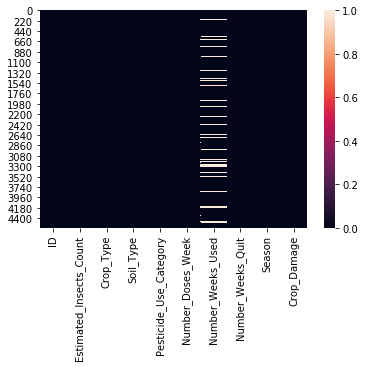

In [7]:
sns.heatmap(df.isnull())

From this heatmap we can clearly see that there are so many missing values present only in one column i:e Number_weeks_used

In [8]:
# we have to remove these missing values by using the SimpleImputer function

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
df['Number_Weeks_Used']=imp.fit_transform(df['Number_Weeks_Used'].values.reshape(-1,1))

In [11]:
df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [12]:
# So now there is no null values present in this Dataset

Lets Drop the Irrelevent columns so that we can get the better result/Score at the end

In [13]:
df.drop(['ID'],axis=1,inplace=True)

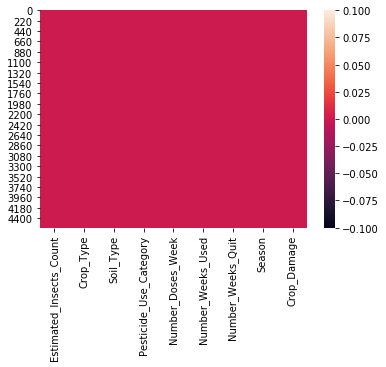

In [14]:
sns.heatmap(df.isnull())

In [15]:
# Now as this dataset contain no null values this is why there is no color change in this Heatmap

In [16]:
df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


In [17]:
df.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.427904,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.002128,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.093539,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.368106,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.099705,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.427904,-0.002128,-0.093539,0.368106,0.099705,1.000000,-0.446200,-0.010590,0.231925
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.446200,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.010590,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.231925,-0.152918,-0.016196,1.000000


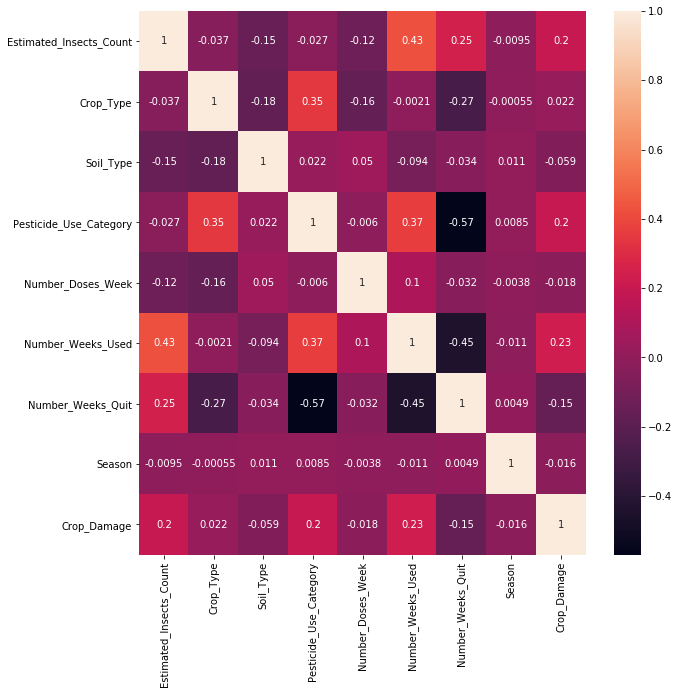

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

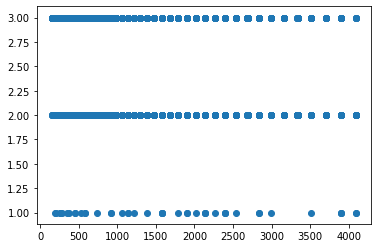

In [19]:
plt.scatter(df['Estimated_Insects_Count'],df['Pesticide_Use_Category'])
plt.show()

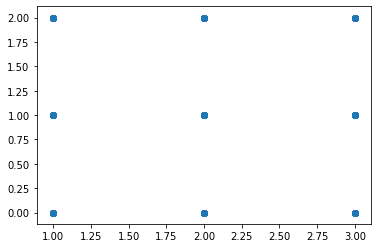

In [20]:
plt.scatter(df['Season'],df['Crop_Damage'])
plt.show()

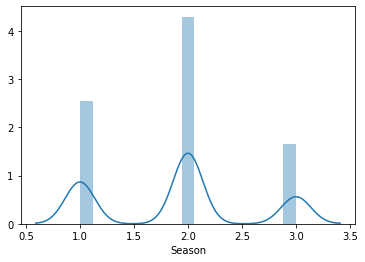

In [21]:
sns.distplot(df['Season'])
plt.show()

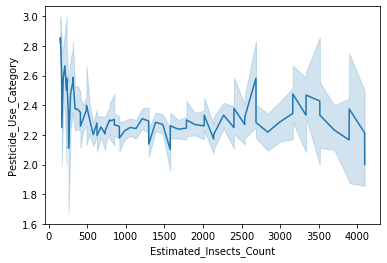

In [22]:
sns.lineplot(df['Estimated_Insects_Count'],df['Pesticide_Use_Category'])
plt.show()

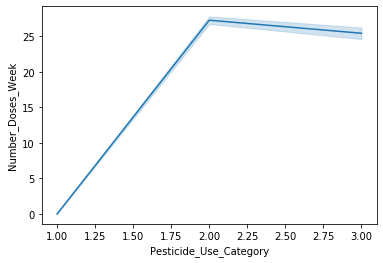

In [23]:
sns.lineplot(df['Pesticide_Use_Category'],df['Number_Doses_Week'])
plt.show()

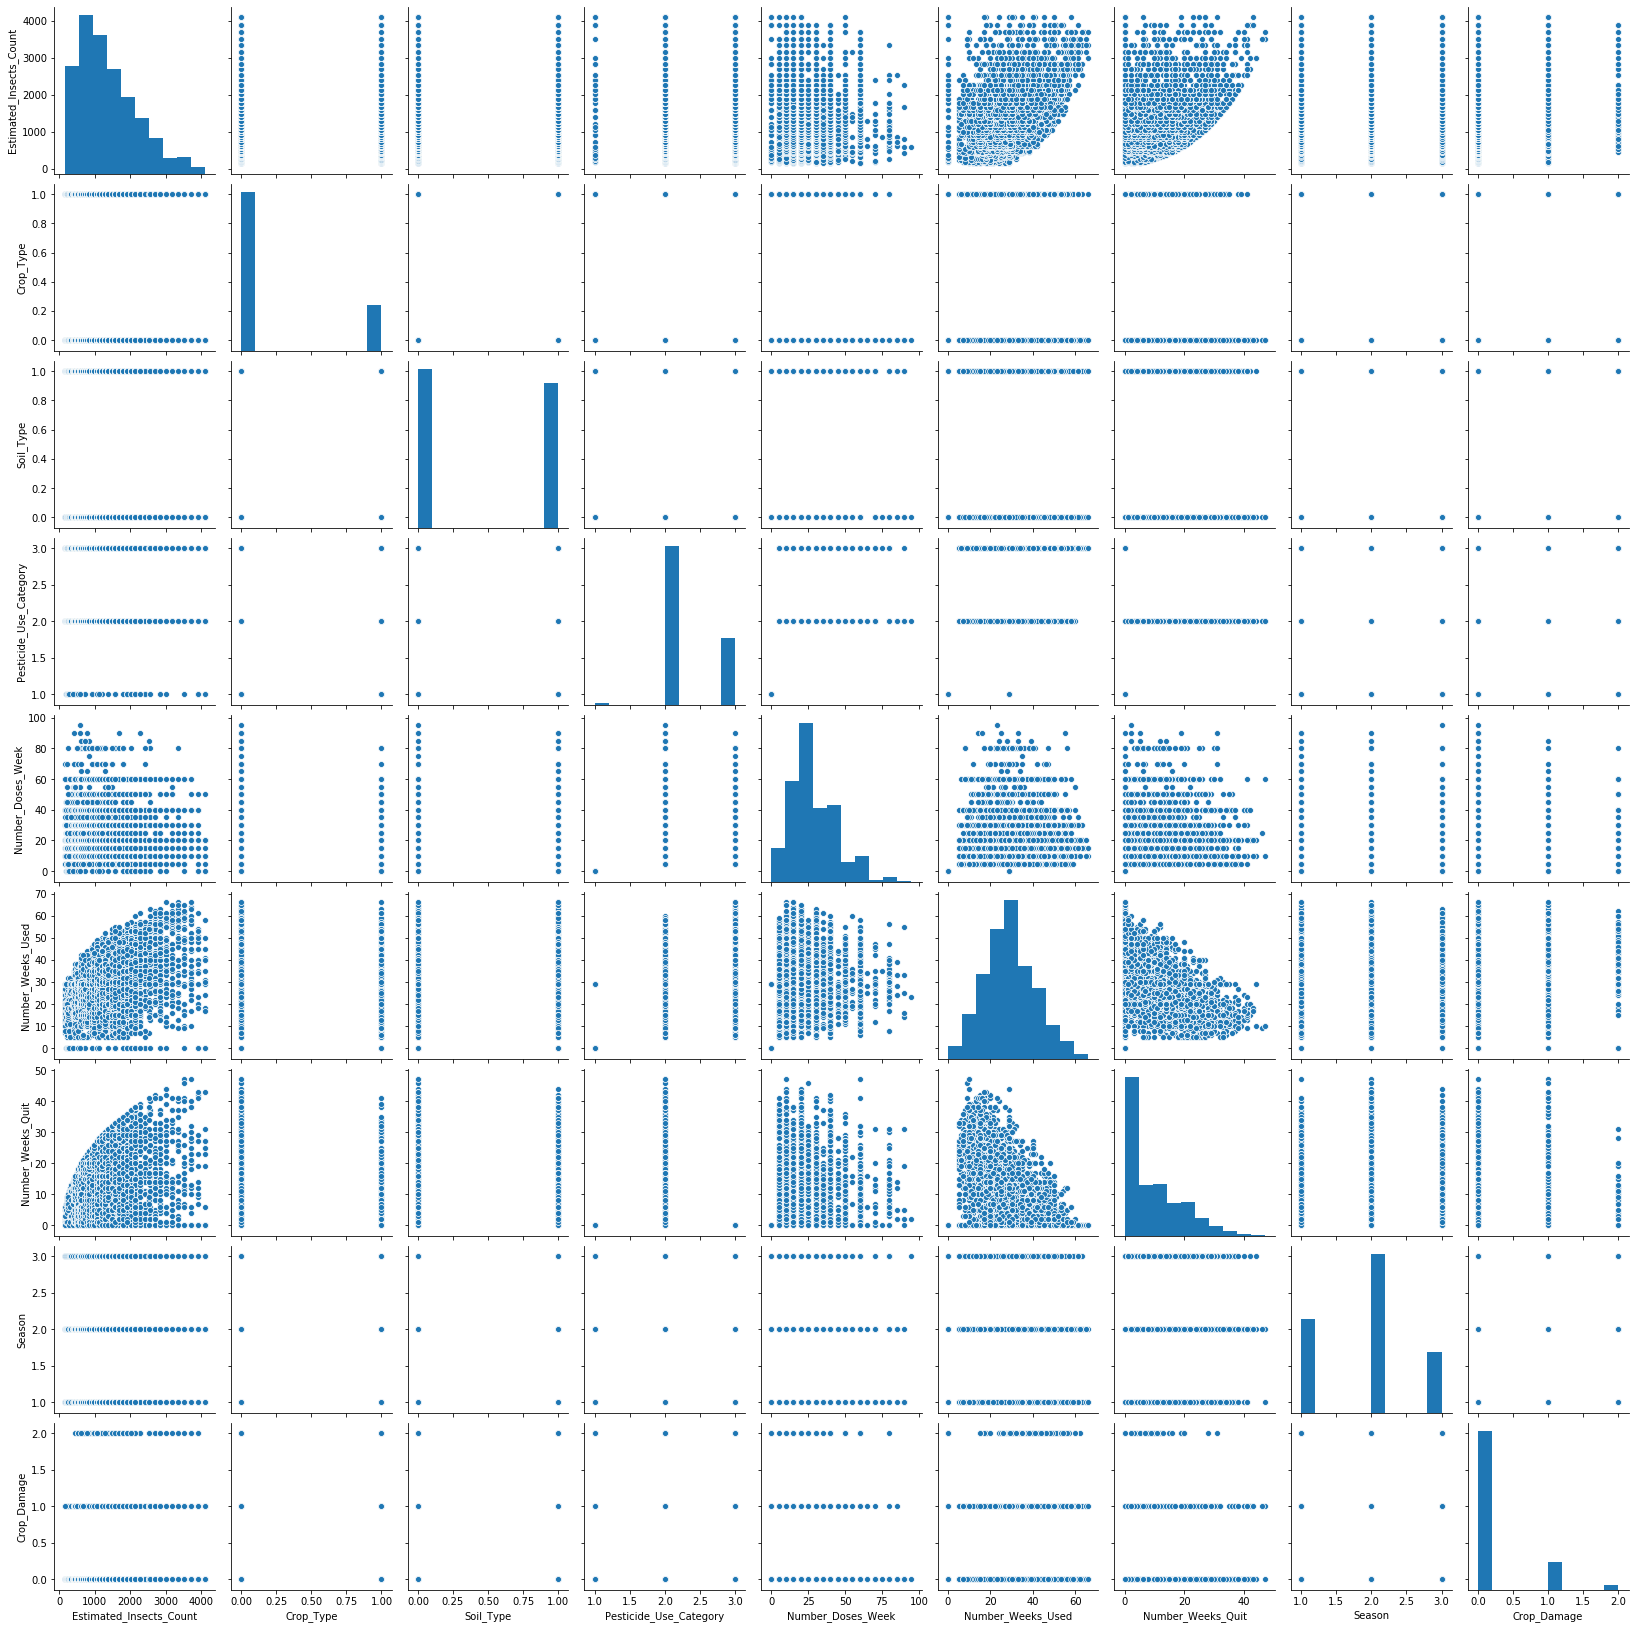

In [24]:
sns.pairplot(df)

In [25]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,11.965785,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.891027,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


From the above we can see that in many columns(Estimated_Insects_Counts, Crop_Type,Number_Doses_Week etc) there are mean>Median(50%) which shows there must be some outliers present in the dataset

In [26]:
#Lets check the ouliers by there Visual representation 

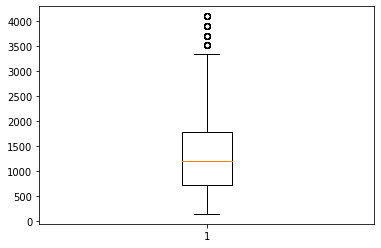

In [27]:
plt.boxplot(df['Estimated_Insects_Count'])
plt.show()

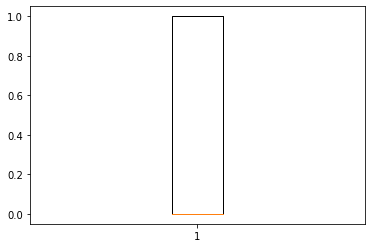

In [28]:
plt.boxplot(df['Soil_Type'])
plt.show()

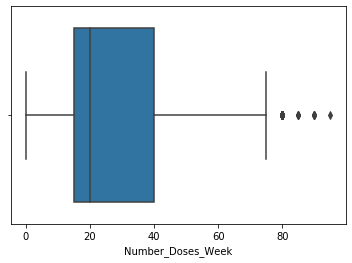

In [29]:
sns.boxplot(df['Number_Doses_Week'])

From the Above Boxplots we can clearly see that there are OutLiers Present in this dataset and to remove these outlies we have to use Zscore menthod

In [30]:
from scipy.stats import zscore

In [31]:
z=np.abs(zscore(df))
z

array([[1.44286807, 1.85681868, 0.95429408, ..., 0.94782668, 1.28702725,
        0.42765624],
       [1.41708065, 1.85681868, 0.95429408, ..., 0.94782668, 0.15207762,
        1.77233374],
       [1.35813798, 1.85681868, 0.95429408, ..., 0.94782668, 0.15207762,
        1.77233374],
       ...,
       [1.11008649, 0.53855555, 1.04789501, ..., 1.83218282, 0.15207762,
        0.42765624],
       [1.11008649, 0.53855555, 1.04789501, ..., 1.52329287, 0.15207762,
        0.42765624],
       [1.11008649, 0.53855555, 1.04789501, ..., 0.80254967, 0.15207762,
        0.42765624]])

In [32]:
np.where(z>3)

(array([   7,    9,   14,   22,   23,  100,  103,  112,  149,  165,  166,
         167,  179,  185,  186,  197,  207,  222,  223,  242,  248,  252,
         264,  265,  290,  296,  305,  316,  325,  346,  351,  355,  361,
         374,  375,  377,  384,  453,  458,  466,  480,  510,  517,  522,
         557,  595,  612,  634,  693,  702,  703,  704,  705,  706,  807,
         819,  855,  856,  911,  944,  978,  980,  998, 1017, 1019, 1067,
        1097, 1178, 1212, 1291, 1307, 1324, 1326, 1327, 1329, 1337, 1339,
        1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1347, 1348, 1349,
        1406, 1443, 1457, 1489, 1523, 1589, 1652, 1654, 1737, 1807, 1868,
        2019, 2043, 2090, 2136, 2139, 2140, 2165, 2170, 2171, 2174, 2183,
        2185, 2188, 2190, 2190, 2191, 2192, 2193, 2194, 2237, 2392, 2553,
        2565, 2585, 2589, 2590, 2590, 2591, 2615, 2663, 2671, 2696, 2702,
        2710, 2714, 2716, 2723, 2767, 2779, 2792, 2796, 2797, 2804, 2806,
        2814, 2828, 2829, 2834, 2841, 

In [33]:
z[4570][8]

3.97232372741325

In [34]:
z[7][8]

3.97232372741325

In [35]:
z[4545][8]

3.97232372741325

In [36]:
df_new=df[(z<3).all(axis=1)]
df_new

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.000000,0,1,0
1,209,1,0,1,0,0.000000,0,2,1
2,257,1,0,1,0,0.000000,0,2,1
3,257,1,1,1,0,0.000000,0,2,1
4,342,1,0,1,0,0.000000,0,2,1
...,...,...,...,...,...,...,...,...,...
4594,2138,0,1,2,20,28.891027,1,1,1
4595,2139,0,1,2,30,47.000000,2,1,1
4596,2267,0,1,2,10,7.000000,27,2,0
4597,2267,0,1,2,10,20.000000,24,2,0


In [37]:
df.shape

(4599, 9)

In [38]:
# here we can see that around 230 rows are deleted as there are OutLiers present in this Dataset

Now, we need to split out dataset into 2 parts, Independent Variable(x) and Dependent Variable(y)

In [39]:
x=df_new.iloc[:,0:8]
x.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,0,1,0,0.0,0,1
1,209,1,0,1,0,0.0,0,2
2,257,1,0,1,0,0.0,0,2
3,257,1,1,1,0,0.0,0,2
4,342,1,0,1,0,0.0,0,2


In [40]:
y=df_new.iloc[:,-1]
y

0       0
1       1
2       1
3       1
4       1
       ..
4594    1
4595    1
4596    0
4597    0
4598    0
Name: Crop_Damage, Length: 4370, dtype: int64

In [41]:
x.shape

(4370, 8)

# TRAIN OUT MODEL ACCORDING TO OUR TARGET VARIABLE

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [43]:
max_acc_score=0
for r_state in range(10,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=r_state)
    logr=LogisticRegression()
    logr.fit(x_train,y_train)
    predlogr=logr.predict(x_test)
    accscore=accuracy_score(y_test,predlogr)
    if(accscore>max_acc_score):
        max_acc_score=accscore
        final_r_state=r_state
print('')
print('The max Accuracy score corresponing to the',final_r_state,'is',max_acc_score)


The max Accuracy score corresponing to the 71 is 0.8775743707093822


In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=71)

In [45]:
predlogr=logr.predict(x_test)
print('Accuracy Score=',accuracy_score(y_test,predlogr))
print(confusion_matrix(y_test,predlogr))
print(classification_report(y_test,predlogr))

Accuracy Score= 0.8764302059496567
[[761   6]
 [102   5]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       767
           1       0.45      0.05      0.08       107

    accuracy                           0.88       874
   macro avg       0.67      0.52      0.51       874
weighted avg       0.83      0.88      0.83       874



Now we hae to check the Accuracy score on diffrent models

In [46]:
model=[MultinomialNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy-Score of',m, 'is')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy-Score of MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) is
0.7196796338672768
[[567 200]
 [ 45  62]]
              precision    recall  f1-score   support

           0       0.93      0.74      0.82       767
           1       0.24      0.58      0.34       107

    accuracy                           0.72       874
   macro avg       0.58      0.66      0.58       874
weighted avg       0.84      0.72      0.76       874



Accuracy-Score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is
0.8775743707093822
[[767   0]
 [107   0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       767
           1       0.00      0.00      0.00       107

    accuracy                           0.88       874
   macro avg      

# ENSEMBLE TECHNIQUES

In [47]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [48]:
rf=RandomForestClassifier(n_estimators=200,random_state=71)

In [49]:
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('Accuracy Score=',accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy Score= 0.8741418764302059
[[745  22]
 [ 88  19]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       767
           1       0.46      0.18      0.26       107

    accuracy                           0.87       874
   macro avg       0.68      0.57      0.59       874
weighted avg       0.84      0.87      0.85       874



In [50]:
ad=AdaBoostClassifier(n_estimators=200,random_state=71)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.8844393592677345
[[755  12]
 [ 89  18]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       767
           1       0.60      0.17      0.26       107

    accuracy                           0.88       874
   macro avg       0.75      0.58      0.60       874
weighted avg       0.86      0.88      0.85       874



In [51]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print(accuracy_score(y_test,predgb))
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

0.8832951945080092
[[759   8]
 [ 94  13]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       767
           1       0.62      0.12      0.20       107

    accuracy                           0.88       874
   macro avg       0.75      0.56      0.57       874
weighted avg       0.86      0.88      0.85       874



# CROSS VALIDATION TECHNIQUES

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
mnb=MultinomialNB()
mnbscores=cross_val_score(mnb,x,y,cv=10)
print(mnbscores)
print('Mean & STD=',mnbscores.mean(),mnbscores.std())

[0.57208238 0.76887872 0.59496568 0.87871854 0.67276888 0.63844394
 0.52402746 0.82837529 0.70251716 0.78718535]
Mean & STD= 0.6967963386727688 0.1111584182022931


In [54]:
svc=SVC()
svcscores=cross_val_score(svc,x,y,cv=10)
print(svcscores)
print(svcscores.mean(),svcscores.std())

[0.85583524 0.85354691 0.85354691 0.85354691 0.85354691 0.85354691
 0.85354691 0.85354691 0.85354691 0.85354691]
0.8537757437070939 0.0006864988558352382


In [55]:
dtc=DecisionTreeClassifier()
dtcscores=cross_val_score(dtc,x,y,cv=10)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[0.64759725 0.76201373 0.73913043 0.74370709 0.6979405  0.73913043
 0.63844394 0.73684211 0.73226545 0.78718535]
0.7224256292906179 0.04508706052603902


# TO SAVE THE BEST MODEL

In [56]:
from sklearn.externals import joblib

In [57]:
joblib.dump(ad,'adfile.obj') # Best Model to save as the Accuracy Score is 88%

['adfile.obj']